# Power-law behaviour

In [2]:
import sys
sys.path.append('C:\\Users\\MHJGuillermo\\PycharmProjects\\Doctorado\\Ising\\Varios_vecinos\\venv\\src')

In [3]:
%pylab inline

from pathlib import Path

import h5py
import numpy as np
import style
from ising.io import read_ising_config
from matplotlib import pyplot, rcParams
from matplotlib.axes import Axes, GridSpec
from matplotlib.figure import Figure
from ruamel.yaml import YAML
from scipy import interpolate as interp
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
import pandas as pd
import json

import os
import re

yaml = YAML()

Populating the interactive namespace from numpy and matplotlib


In [32]:
def model_function(x: float,a1: float,a2: float,a3: float):
    return a1*(1/(1 + a2*(x**a3)))


def get_extrapol_function(model_function,a1,a2,a3):
    def extrapol_funct(x):
        return model_function(x,a1,a2,a3)
    return extrapol_funct

C:\Users\MHJGuillermo\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in power
  


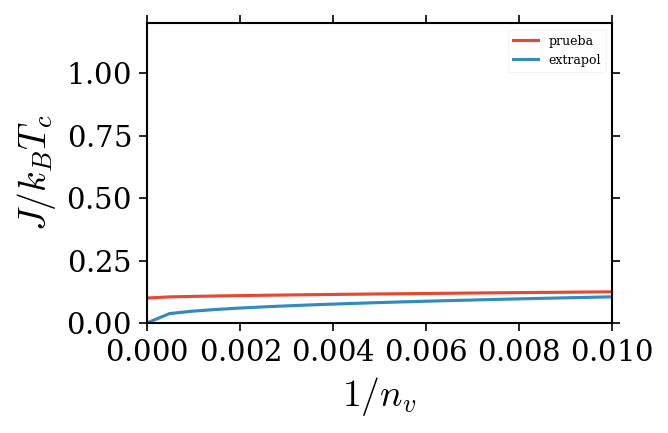

In [59]:
x = np.linspace(0, 1, 2048)
y = model_function(x,0.1, -2, 0.5)

(a1,a2,a3) = (-0.4621787906306267,-1.3852093948873558,-0.2958597878507462)
extrapol_funct = get_extrapol_function(model_function, a1,a2,a3)
y_ext = extrapol_funct(x)

# Load the default style.
style.use("default")
rcParams["text.usetex"] = False

fig1: Figure = pyplot.figure(figsize=(4, 9), dpi=150)
grid_spec = GridSpec(3, 1)

# Specific heat subplot.
ax: Axes = fig1.add_subplot(grid_spec[0, 0])

ax.plot(x,y, lw=1.5,label='prueba')
ax.plot(x,y_ext,lw=1.5,label='extrapol')

ax.set_xlabel(r"$1/n_v$")
ax.set_ylabel(r"$J/k_BT_c$")
ax.legend()
# add text
# ax.text(0, 1, r"$\frac{J}{k_BT} = a_1/(1 + a_2 \left(\frac{1}{n_v}\right)^{a_3})$")
pyplot.xlim([0,0.01])
pyplot.ylim([0,1.2])# ax.set_title(COLUMN)
pyplot.draw()

In [68]:
a1*(1/(1+a2*(0.001**a3)))

0.04768228581003059